<img height="100" width="480" src="https://pictures.ozy.com/pictures/2048x1152/3/2/0/101320_shutterstock_406913140.jpg"></img>
# <font color= "red" > Customer_Segmentation_Study_Machine_Learning</font>
### <u>Clustering K-Means</u>:Model Implementation

<p1>
<h3></h3> This dataset represents the purchase behavior of customers at Spencers’ supermarket in Eastern part of India. It has 702 rows of data.
</p1><br>

### 1. Dataset Description  <a id='columns'>

The dataset consists of 702 individuals with 6 attributes.Below are the all column description of the given datasets.<br>

    -1 Customer_ID –: id of customer
    -2 AVG_Actual_price_12 –: MRP   
    -3 Purchase_Value –: Total amount of purchase customer has made
    -4 No_of_Items –: Number of items bought 
    -5 Total_Discount-: Discount availed by each customer
    -6 MONTH_SINCE_LAST_TRANSACTION –: Last month of visit in supermarket


<font color="Green"><h3>The main aim to perform <u>Cluster customers into different segments or groups based on the attributes given using clustering algorithms.</u></h3></font>


### Importing all Packages & Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the datasets for Implementation

In [2]:
df= pd.read_csv("D:/BigDataProjects/DataScience/ProjectDone/ML_Projects/Customer_Segmentation&Recommendation/CustomerSegmentation_Recommendation/Supermarket_Purchase.csv")
print("The Total Number of Rows= {} and Columns= {} in the Given Datasets".format(df.shape[0],df.shape[1]))

The Total Number of Rows= 702 and Columns= 6 in the Given Datasets


### Data Cleaning and Removing columns that are 90% empty

In [3]:
thresh=len(df)*.1
df.dropna(thresh=thresh,axis=1,inplace=True)

df.replace('?',np.NaN, inplace=True)
df.isnull().sum()

Cust_id                         0
AVG_Actual_price_12             0
Purchase_Value                  0
No_of_Items                     0
Total_Discount                  0
MONTH_SINCE_LAST_TRANSACTION    0
dtype: int64

### Visualization

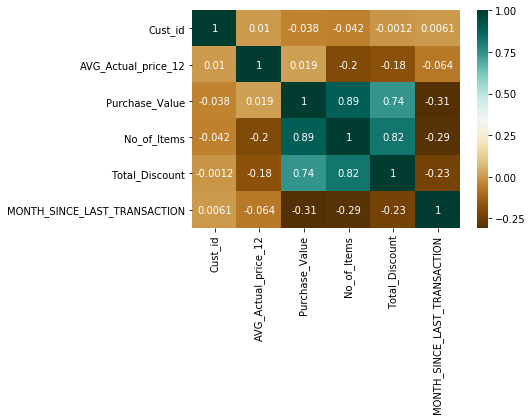

In [4]:
sns.heatmap(df.corr(),annot=True,cmap='BrBG')

### Reading first 5 data from the datasets

In [5]:
df.head(5)

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,1,300.000000,1200.00,4,0.00,11
1,2,2563.282500,41012.52,16,78737.48,2
2,4,3510.000000,7020.00,2,780.00,4
3,8,4530.000000,13590.00,3,1510.00,1
4,9,2428.076923,33455.00,15,17445.00,6


### Building and Evaluating Models

In [6]:
from sklearn.cluster import KMeans
feature_cols=['Cust_id','AVG_Actual_price_12','Purchase_Value','No_of_Items','Total_Discount','MONTH_SINCE_LAST_TRANSACTION']
x=df[feature_cols]

#### Standard scaling of feature columns

In [7]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
dff=ss.fit_transform(x)

In [8]:
dff.std()

1.0

In [9]:
import numpy as np
from scipy.spatial.distance import cdist

In [10]:
ssw=[]
K=range(1,20)
for k in K:
    kmeanmodel=KMeans(n_clusters=k)
    kmeanmodel.fit(dff)
    ssw.append(sum(np.min(cdist(dff, kmeanmodel.cluster_centers_, 'cityblock'), axis=1)) / dff.shape[0])

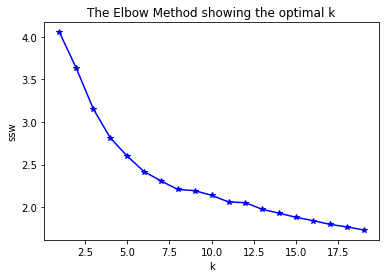

In [11]:
plt.plot(K, ssw, 'b-*')
plt.xlabel('k')
plt.ylabel('ssw')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
my_kmeans=KMeans(n_clusters=8)
km_model=my_kmeans.fit(dff)
km_model.cluster_centers_

array([[-0.75021023, -0.6139199 , -0.22672597, -0.08121788, -0.06594975,
        -0.65419388],
       [ 0.86497379, -0.2718585 , -0.36890086, -0.3563324 , -0.27140023,
         1.25174022],
       [-0.23317702, -0.4828422 ,  5.51739655,  5.86524522,  5.95535172,
        -1.1084965 ],
       [-0.09452762, -0.35029393,  1.65339668,  1.73006293,  1.11997091,
        -0.72974064],
       [ 0.60901274,  1.96237119, -0.23237486, -0.43551653, -0.3424855 ,
        -0.34219588],
       [-0.86561067, -0.23710704, -0.33442527, -0.31830201, -0.22998526,
         1.13134724],
       [ 1.03647565, -0.42692949, -0.11892658, -0.044135  , -0.05395142,
        -0.62216641],
       [-0.85524401,  0.96714436,  0.04022158, -0.2664426 , -0.28311734,
        -0.47878348]])

### Forming the cluster

In [13]:
size=km_model.labels_
size=list(size)

In [14]:
print("The count for the following Cluster are :")
for i in range(0,8):
    print("Cluster {} ={}".format(i,size.count(i)))


The count for the following Cluster are :
Cluster 0 =127
Cluster 1 =111
Cluster 2 =12
Cluster 3 =44
Cluster 4 =69
Cluster 5 =121
Cluster 6 =135
Cluster 7 =83


### Adding the Cluster to dataframe

In [15]:
df['cluster']=km_model.labels_
df.head(2)

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION,cluster
0,1,300.0000,1200.00,4,0.00,11,5
1,2,2563.2825,41012.52,16,78737.48,2,0


### Providing the Pivot table for entire datasets

In [16]:
Segment_profile=pd.pivot_table(df,values=['Cust_id','AVG_Actual_price_12','Purchase_Value','No_of_Items','Total_Discount','MONTH_SINCE_LAST_TRANSACTION'],index='cluster',aggfunc=np.mean)
Segment_profile

,AVG_Actual_price_12,Cust_id,MONTH_SINCE_LAST_TRANSACTION,No_of_Items,Purchase_Value,Total_Discount
cluster,,,,,,
0,1490.059497,279.692913,2.700787,9.094488,11972.497559,16955.785906
1,2132.382201,757.054054,9.486486,3.585586,7051.103784,4960.319640
2,1736.197131,432.500000,1.083333,128.166667,210805.710000,368516.508333
3,1985.096184,473.477273,2.431818,45.363636,77053.077727,86197.149545
4,6327.817337,681.405797,3.811594,2.000000,11776.961014,809.923043
5,2197.638454,245.586777,9.057851,4.347107,8244.478678,7378.380826
6,1841.189974,807.740741,2.814815,9.837037,15703.981333,17656.322370
7,4458.981014,248.650602,3.325301,5.385542,21212.906265,4276.202169


## Visualization

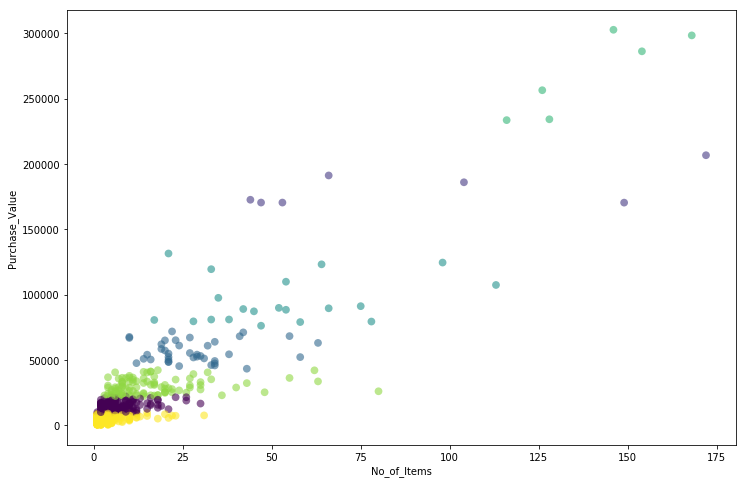

In [17]:
kmeans_vis= KMeans(n_clusters=7,init='k-means++',random_state=400)
kmeans_vis.fit(df[['Cust_id','MONTH_SINCE_LAST_TRANSACTION','No_of_Items','Purchase_Value']])
fig=plt.figure(figsize=(12,8))
plt.scatter(df['No_of_Items'],df['Purchase_Value'],60,c=kmeans_vis.labels_, alpha = 0.6,label=df['cluster'],edgecolors='none')
plt.xlabel('No_of_Items')
plt.ylabel('Purchase_Value')
#[plt.text(row.Assault, row.Murder, row.State) for row in df.itertuples()]
plt.show()